# Basic Regression algorithm 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading the datasets
train = pd.read_csv("H1_train.csv")
test = pd.read_csv("H1_test.csv")

# removing the index that was mistaken as a column
test.drop(test.columns[0],axis=1,inplace = True)
train.drop(train.columns[0],axis=1,inplace = True)


# First let's plot our data 

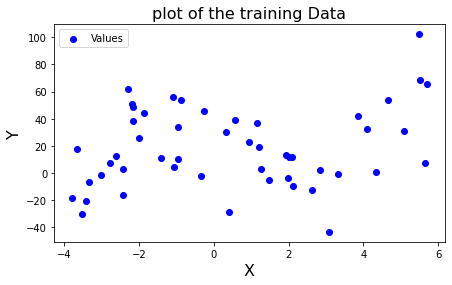

In [32]:

# plotting the training data

plt.figure(figsize= (7,4))

plt.scatter(train.x,train.y,c= "b",label = "Values")
plt.xlabel("X", size = 16)
plt.ylabel("Y", size = 16)
plt.title("plot of the training Data", size = 16)
plt.legend()
plt.show()

# Now, let's estimate a linear regression model ( 𝑦=𝑎0+𝑎1𝑥 ) for the training data and calculate both the  𝑅2  value and mean square error for the fit of that model for the training data. (for simplicity I only included two coef, I will be adding more later), 

# *let 's call it model b*

## First let's do it using a pipeline

In [9]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.pipeline import make_pipeline

# estimating the linear regression model of degree 2 because we have y = a_0 + a_1 x
pipe = make_pipeline(PolynomialFeatures(1),LinearRegression()) # making a pipeline
pipe.fit(train.x[:,np.newaxis],train.y) # fitting X and Y to the linear model 
Y_pred = pipe.predict(train.x[:,np.newaxis]) # predicting the y values of the test data
print("the explained variance : %.4f / MSE : %.4f"%(r2_score(train.y,Y_pred) ,mean_squared_error(train.y,Y_pred)))
print("linear regression model of degree 1 : y = %.4f + %.4fx"%(pipe.steps[1][1].intercept_, pipe.steps[1][1].coef_[1]) )

the explained variance : 0.0649 / MSE : 791.4167
linear regression model of degree 1 : y = 17.2049 + 2.5907x


## now, without a pipeline. (the result are not different because the method is basically the same)

In [10]:
pol = PolynomialFeatures(1)
XXX = pol.fit_transform(train.x[:,np.newaxis])
mod = LinearRegression() # making a pipeline
mod.fit(XXX,train.y) # fitting X and Y to the linear model 
Y_pred = pipe.predict(train.x[:,np.newaxis]) # predicting the y values of the test data
print("the explained variance : %.4f / MSE : %.4f"%(r2_score(train.y,Y_pred) ,mean_squared_error(train.y,Y_pred)))
print("linear regression model of degree 1 : y = %.4f + %.4fx"%(mod.intercept_, mod.coef_[1]) )

the explained variance : 0.0649 / MSE : 791.4167
linear regression model of degree 1 : y = 17.2049 + 2.5907x


# Let's go further now and see if the features can be nonlinearly transformed. (I indirectly did it at first when I tried to guess it from the scatter plot)

# *let 's call it model c*

 MSE : 510.8850
 R^2 : 0.3963
 y = 24.1554 + 0.0000 x^0 + -9.2519 x^1 + -2.1257 x^2 + 0.8970 x^3


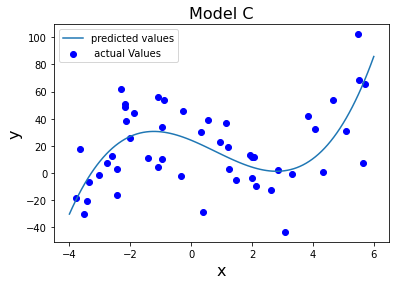

In [30]:
'''
In order to find the ideal degree I will be plotting it with different degrees and choose the one
with the best MSE and R2, form a first look, the training data looked like a x^3 function that was 
'''

# recreating PolynomialFeatures
def pol_feat(x,d):
    '''
    x : column from a pandas data Frame
    d : int : number of degrees
    
    returning a design matrix with d columns
    '''
    x = np.array(x)
    X = []
    for i in range(d+1):
            X.append(x**i)
    #X.append(x**3)
    return np.array(X).T

degree = 3 # the justification for the degree I have chosen can be found below
X = pol_feat(train.x,degree) #creating the design matrix of X
model_fin = LinearRegression() # linear regression model
model_fin.fit(X,train.y) # training the model
y_predic = model_fin.predict(X) # predicting the model


print (" MSE : %.4f" %mean_squared_error(train.y,y_predic))
print(" R^2 : %.4f"%r2_score(train.y,y_predic))

intercept_ = model_fin.intercept_
str_coef = " y = %.4f"%intercept_
for i in range(degree+1) :
    str_coef += " + %.4f x^%d"%(model_fin.coef_[i],i)
print(str_coef)
plt.scatter(train.x,train.y,c= "b",label = " actual Values")
x_plot = np.linspace(-4,6,100)
plt.plot(x_plot,model_fin.predict(pol_feat(x_plot,degree)) , label = "predicted values")
#plt.ylim([-40,100])
plt.xlabel("x",size = 16)
plt.ylabel("y",size = 16)
plt.legend()
plt.title('Model C', size = 16)
plt.show()

# in order to find a good predictors, we will be plotting the MSE and $R^2$ for different degrees then choose the best one

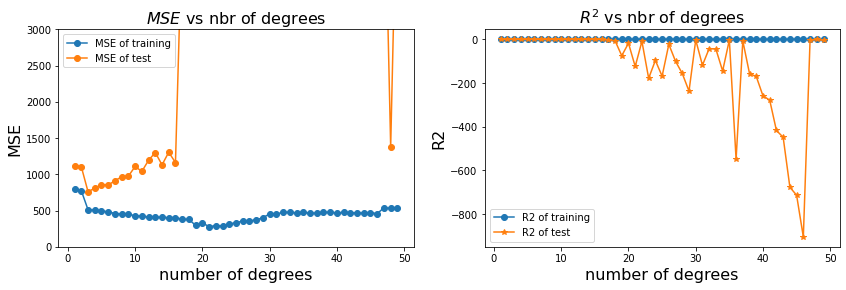

In [29]:
# Note that I am only plotting the test data for clarity,  but I am not using it to draw conclusions

N_train = int(train.x.shape[0])
R2_train = []
MSE_train = []

R2_test = []
MSE_test = []

for deg in range(1,N_train):
    X_train = pol_feat(train.x,deg) #creating the design matrix of X
    X_test = pol_feat(test.x,deg)
    model = LinearRegression()
    model.fit(X_train,train.y)
    
    mse_test = mean_squared_error(test.y,model.predict(X_test))
    mse_tra = mean_squared_error(train.y,model.predict(X_train))
    r2_tra = r2_score(train.y,model.predict(X_train))
    r2_test = r2_score(test.y,model.predict(X_test))
    MSE_train.append(mse_tra)
    MSE_test.append(mse_test)
    R2_train.append(r2_tra)
    R2_test.append(r2_test)
    
plt.figure(figsize= (14,4))

plt.subplot(1,2,1)
# let s plot MSE, from the plot we can notice that there is a point where it 
#reaches a minimum between 0 to 10 for both the training and the test
plt.plot(range(1,N_train),MSE_train, "o-" , label = "MSE of training") 
plt.plot(range(1,N_train),MSE_test, "o-" , label = "MSE of test")
plt.legend()
plt.xlabel("number of degrees", size = 16)
plt.ylabel("MSE", size = 16)
plt.ylim([0,3000])
plt.title('$MSE$ vs nbr of degrees', size = 16)


plt.subplot(1,2,2)
# let s plot R2, we also notice here that between 0 and 10 R2 is stable and fluctuates later for the test data 
#I will this not be using R2 (because I mostly care about the interval [0,10] where that minimum is met)
plt.plot(range(1,N_train),R2_train,"o-", label = "R2 of training")
plt.plot(range(1,N_train),R2_test,"*-", label = "R2 of test")
plt.xlabel("number of degrees", size = 16)
plt.ylabel("R2", size = 16)
plt.legend()
plt.title('$R^2$ vs nbr of degrees', size = 16)

plt.show()

In [14]:
# let s find that point where MSE has the biggest drop you can notice that I did not use the test data to find the 
# best degree

def finding_best_degree(arr,low=-1,high=-1,slope = -10): 
    '''
    function that returns the degree where MSE has the sharpest drop in an array of consecutive MSE values 
    '''  
    if high ==-1 and low ==-1:
        low = 0
        high = np.array(arr).shape[0]
    MSE_tr = np.array(arr)[low:high]
    curr_min = high
    for i in range(high):
        slope_ = MSE_tr[i-1] - MSE_tr[i]
        if slope_ > slope:
            slope = slope_
            best_degree = low + i +1 # plus two because the array starts from 0 so index 0 is degree 1 and so on
    return best_degree


best_degree = finding_best_degree(MSE_train)
print("Best Degree found : %d"%best_degree)

Best Degree found : 3


# Now, let's make a small comparisons with the two models made, (the one with just 2 degree and the one with 3)

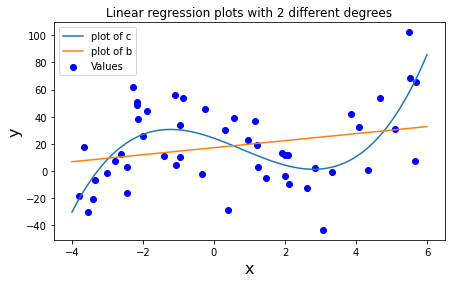

In [25]:

plt.figure(figsize= (7,4))
plt.scatter(train.x,train.y,c= "b",label = "Values")
x_plot = np.linspace(-4,6,100)
plt.plot(x_plot,model_fin.predict(pol_feat(x_plot,degree)) , label = "plot of c") # plot of c
plt.plot(x_plot,pipe.predict(x_plot[:,np.newaxis]) , label = "plot of b") # plot of b
plt.xlabel("x",size = 16)
plt.ylabel("y",size = 16)
plt.title('Linear regression plots with 2 different degrees')
plt.legend()
plt.show()

In [13]:
# model of b
test_pred = pipe.predict(test.x[:,np.newaxis])

print(" the explained variance in model b is : %.4f"%r2_score(test.y,test_pred))
print(" MSE of b : %.4f\n"%mean_squared_error(test.y,test_pred))

# model of c
test_pred_c = model_fin.predict(pol_feat(test.x,degree))

print(" the explained variance in model c is : %.4f"%r2_score(test.y,test_pred_c))
print(" MSE of c : %.4f"%mean_squared_error(test.y,test_pred_c))

 the explained variance in model b is : -0.1329
 MSE of b : 1116.6632

 the explained variance in model c is : 0.2295
 MSE of c : 759.5031
